# Naive Bayes

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [4]:
# load data
df = pd.read_csv('data/df_eda2_cat.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187812 entries, 0 to 187811
Columns: 193 entries, state to "slug":"theater/spaces"
dtypes: float64(2), int64(190), object(1)
memory usage: 276.5+ MB


,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,successful,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,successful,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,failed,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,successful,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,successful,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# convert target column ('state') to numeric values
df['state'].replace({'failed':0, 'successful':1}, inplace=True)
df.head()

,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,1,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [6]:
# split features from target (features: X, target: y)
X = df.drop('state', axis=1)
y = df['state']
X.head()

,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,ES,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,6.907755,23,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.615805,51,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.479141,34,1439.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.937375,40,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.160518,31,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (131468, 192)
y_train: (131468,)
X_test: (56344, 192)
y_test: (56344,)


In [8]:
# create Naive Bayes classifier

# instantiate classifier
NB_clf = GaussianNB()
# fit model to training data
NB_clf.fit(X_train, y_train)

# predict target values for train data
y_pred_train = NB_clf.predict(X_train)
# predict target values for test data
y_pred = NB_clf.predict(X_test)


In [19]:

# Print classification reports for NB classifier

## train data
print('Classification report for TRAIN data: \n {}'.format(classification_report(y_train, y_pred_train)))
print("--------"*10)

## test data
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

Classification report for TRAIN data: 
               precision    recall  f1-score   support

           0       0.57      0.92      0.71     51610
           1       0.92      0.56      0.69     79858

    accuracy                           0.70    131468
   macro avg       0.75      0.74      0.70    131468
weighted avg       0.78      0.70      0.70    131468

--------------------------------------------------------------------------------
Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.57      0.92      0.70     22082
           1       0.92      0.55      0.69     34262

    accuracy                           0.70     56344
   macro avg       0.74      0.74      0.70     56344
weighted avg       0.78      0.70      0.69     56344

--------------------------------------------------------------------------------


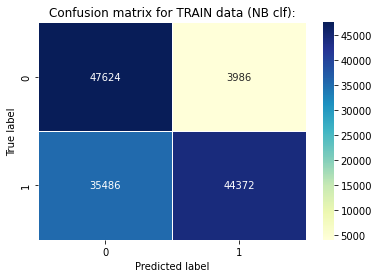

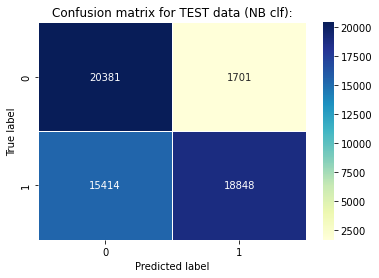

In [31]:
# Evaluate the model with a confusion matrix
## train data
cm = confusion_matrix(y_train, y_pred_train)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TRAIN data (NB clf):');

## test data
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');